# 1. Imports

In [3]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Methods

## Loading Datasets

In [4]:
def get_dataset_dataframe(dataset_folder_name, dataset_sub_folder_name, dataset_file_name):
    # Move up from /notebooks → /Thesis
    base_dir = os.path.dirname(os.getcwd())

    # Full path to your .jsonl file
    file_path = os.path.join(base_dir, "datasets", dataset_folder_name, dataset_sub_folder_name, dataset_file_name)

    # Confirm the file is there
    print("Reading from:", file_path)

    # Load with pandas (must use lines=True for .jsonl format)
    df = pd.read_json(file_path, lines=True)

    return df

## Null Counter

In [5]:
def count_nulls_in_column(df):
    return df[df.columns].isnull().sum()

## CountPlot

In [14]:
def getcountplot(dataframe, column_name, dataset_name):    
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(data=dataframe, x=column_name)

    # Calculate total count for percent calculation
    total = len(dataframe)

    # Add percentage labels
    for p in ax.patches:
        count = p.get_height()
        percentage = 100 * count / total
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.text(x, y + 1, f'{percentage:.1f}%', ha='center', va='bottom', fontweight='bold')

    # Labels and title
    plt.title(f"Count of {column_name} Values in {dataset_name}")
    plt.xlabel(column_name)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# 3. Code

## Raw FEVER Data

In [ ]:
fever_train_df = get_dataset_dataframe("FEVER", "raw", "train.jsonl")
fever_train_df.head()

Reading from: e:\Users\Anirudh\Study\MS\Implementation\Thesis\datasets\FEVER\raw\train.jsonl


,id,verifiable,label,claim,evidence
0,75397,VERIFIABLE,SUPPORTS,Nikolaj Coster-Waldau worked with the Fox Broa...,"[[[92206, 104971, Nikolaj_Coster-Waldau, 7], [..."
1,150448,VERIFIABLE,SUPPORTS,Roman Atwood is a content creator.,"[[[174271, 187498, Roman_Atwood, 1]], [[174271..."
2,214861,VERIFIABLE,SUPPORTS,"History of art includes architecture, dance, s...","[[[255136, 254645, History_of_art, 2]]]"
3,156709,VERIFIABLE,REFUTES,Adrienne Bailon is an accountant.,"[[[180804, 193183, Adrienne_Bailon, 0]]]"
4,83235,NOT VERIFIABLE,NOT ENOUGH INFO,System of a Down briefly disbanded in limbo.,"[[[100277, None, None, None]]]"


In [22]:
fever_train_df.shape

(145449, 5)

In [29]:
fever_train_null_counter = count_nulls_in_column(fever_train_df)
fever_train_null_counter

id            0
verifiable    0
label         0
claim         0
evidence      0
dtype: int64

In [ ]:
fever_paper_test_df = get_dataset_dataframe("FEVER", "raw", "paper_test.jsonl")
fever_paper_test_df.head()

Reading from: e:\Users\Anirudh\Study\MS\Implementation\Thesis\datasets\FEVER\raw\paper_test.jsonl


,id,verifiable,label,claim,evidence
0,113501,NOT VERIFIABLE,NOT ENOUGH INFO,Grease had bad reviews.,"[[[133128, None, None, None]]]"
1,163803,VERIFIABLE,SUPPORTS,Ukrainian Soviet Socialist Republic was a foun...,"[[[296950, 288668, Ukrainian_Soviet_Socialist_..."
2,70041,VERIFIABLE,SUPPORTS,2 Hearts is a musical composition by Minogue.,"[[[225394, 230056, 2_Hearts_-LRB-Kylie_Minogue..."
3,202314,VERIFIABLE,REFUTES,The New Jersey Turnpike has zero shoulders.,"[[[238335, 240393, New_Jersey_Turnpike, 15]]]"
4,57085,NOT VERIFIABLE,NOT ENOUGH INFO,Legendary Entertainment is the owner of Wanda ...,"[[[178035, None, None, None], [182093, None, N..."


In [21]:
fever_paper_test_df.shape

(9999, 5)

In [28]:
fever_paper_test_null_counter = count_nulls_in_column(fever_paper_test_df)
fever_paper_test_null_counter

id            0
verifiable    0
label         0
claim         0
evidence      0
dtype: int64

In [ ]:
fever_paper_dev_df = get_dataset_dataframe("FEVER", "raw", "paper_dev.jsonl")
fever_paper_dev_df.head()

Reading from: e:\Users\Anirudh\Study\MS\Implementation\Thesis\datasets\FEVER\raw\paper_dev.jsonl


,id,verifiable,label,claim,evidence
0,91198,NOT VERIFIABLE,NOT ENOUGH INFO,Colin Kaepernick became a starting quarterback...,"[[[108548, None, None, None]]]"
1,194462,NOT VERIFIABLE,NOT ENOUGH INFO,Tilda Swinton is a vegan.,"[[[227768, None, None, None]]]"
2,137334,VERIFIABLE,SUPPORTS,Fox 2000 Pictures released the film Soul Food.,"[[[289914, 283015, Soul_Food_-LRB-film-RRB-, 0..."
3,166626,NOT VERIFIABLE,NOT ENOUGH INFO,Anne Rice was born in New Jersey.,"[[[191656, None, None, None], [191657, None, N..."
4,111897,VERIFIABLE,REFUTES,Telemundo is a English-language television net...,"[[[131371, 146144, Telemundo, 0]], [[131371, 1..."


In [20]:
fever_paper_dev_df.shape

(9999, 5)

In [27]:
fever_paper_dev_null_counter = count_nulls_in_column(fever_paper_dev_df)
fever_paper_dev_null_counter

id            0
verifiable    0
label         0
claim         0
evidence      0
dtype: int64

## Merged FEVER Dataset

In [34]:
FEVER_df = pd.concat([fever_train_df, fever_paper_test_df, fever_paper_dev_df], ignore_index=True)
FEVER_df.head()

,id,verifiable,label,claim,evidence
0,75397,VERIFIABLE,SUPPORTS,Nikolaj Coster-Waldau worked with the Fox Broa...,"[[[92206, 104971, Nikolaj_Coster-Waldau, 7], [..."
1,150448,VERIFIABLE,SUPPORTS,Roman Atwood is a content creator.,"[[[174271, 187498, Roman_Atwood, 1]], [[174271..."
2,214861,VERIFIABLE,SUPPORTS,"History of art includes architecture, dance, s...","[[[255136, 254645, History_of_art, 2]]]"
3,156709,VERIFIABLE,REFUTES,Adrienne Bailon is an accountant.,"[[[180804, 193183, Adrienne_Bailon, 0]]]"
4,83235,NOT VERIFIABLE,NOT ENOUGH INFO,System of a Down briefly disbanded in limbo.,"[[[100277, None, None, None]]]"


In [40]:
output_path = os.path.join("..", "datasets", "FEVER", "pre-processed", "FEVER_Merged.jsonl")
FEVER_df.to_json(output_path, orient="records", lines=True)

## FEVER Data Analysis

In [6]:
FEVER_df = get_dataset_dataframe("FEVER", "pre-processed", "FEVER_Merged.jsonl")
FEVER_df.head()

Reading from: e:\Users\Anirudh\Study\MS\Implementation\Thesis\datasets\FEVER\pre-processed\FEVER_Merged.jsonl


,id,verifiable,label,claim,evidence
0,75397,VERIFIABLE,SUPPORTS,Nikolaj Coster-Waldau worked with the Fox Broa...,"[[[92206, 104971, Nikolaj_Coster-Waldau, 7], [..."
1,150448,VERIFIABLE,SUPPORTS,Roman Atwood is a content creator.,"[[[174271, 187498, Roman_Atwood, 1]], [[174271..."
2,214861,VERIFIABLE,SUPPORTS,"History of art includes architecture, dance, s...","[[[255136, 254645, History_of_art, 2]]]"
3,156709,VERIFIABLE,REFUTES,Adrienne Bailon is an accountant.,"[[[180804, 193183, Adrienne_Bailon, 0]]]"
4,83235,NOT VERIFIABLE,NOT ENOUGH INFO,System of a Down briefly disbanded in limbo.,"[[[100277, None, None, None]]]"


In [7]:
FEVER_df.shape

(165447, 5)

Data Description:
1. id: The ID of the claim
2. label: The annotated label for the claim - SUPPORTS|REFUTES|NOT ENOUGH INFO.
3. claim: The text of the claim.
4. evidence: 

    A list of evidence sets like this
    
    [
        [[Annotation ID, Evidence ID, Wikipedia URL/ Page Name, sentence ID] , ...], # evidence set 1
        [[Annotation ID, Evidence ID, Wikipedia URL/ Page Name, sentence ID] , ...], # evidence set 2
        ...
    ]
     
     or

    A [Annotation ID, Evidence ID, null, null] tuple if the label is NOT ENOUGH INFO.

5. verifiable: There are 2 kind of values - 'VERIFIABLE' & 'NOT VERIFIABLE'
    - Whenever a claim is verified ,i.e. either supports or refutes, with the given evidence, then, that comes under 'VERIFIABLE', whereas
    - When a claim can't be verified, i.e. neither supports nor refutes, in the absence or the appropriate evidence, then, that comes under 'NOT VERIFIABLE'.

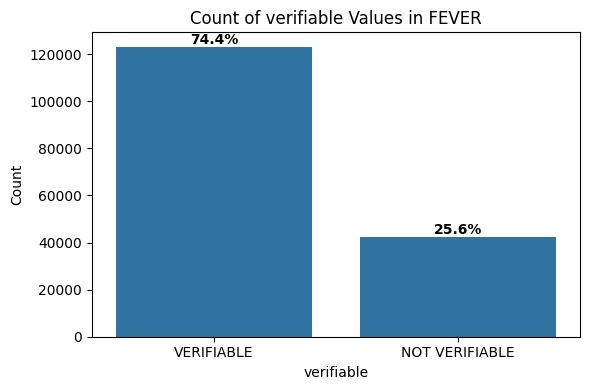

In [18]:
getcountplot(FEVER_df, 'verifiable', 'FEVER')

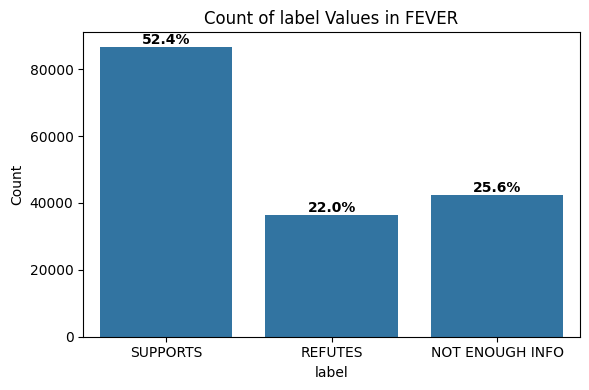

In [19]:
getcountplot(FEVER_df, 'label', 'FEVER')

In [ ]:
# Dropping the 'verifiable' column as we already have the 'label' column
FEVER_df = FEVER_df.drop(columns=['verifiable'])
FEVER_df.head()

In [44]:
FEVER_df.head()

,id,label,claim,evidence,evidence_count
0,75397,SUPPORTS,Nikolaj Coster-Waldau worked with the Fox Broa...,"[[[92206, 104971, Nikolaj_Coster-Waldau, 7], [...",1
1,150448,SUPPORTS,Roman Atwood is a content creator.,"[[[174271, 187498, Roman_Atwood, 1]], [[174271...",2
2,214861,SUPPORTS,"History of art includes architecture, dance, s...","[[[255136, 254645, History_of_art, 2]]]",1
3,156709,REFUTES,Adrienne Bailon is an accountant.,"[[[180804, 193183, Adrienne_Bailon, 0]]]",1
4,83235,NOT ENOUGH INFO,System of a Down briefly disbanded in limbo.,"[[[100277, None, None, None]]]",1


In [30]:
FEVER_df['evidence_count'] = FEVER_df['evidence'].apply(lambda x: len(x))
FEVER_df['evidence_count'].head()

0    1
1    2
2    1
3    1
4    1
Name: evidence_count, dtype: int64

In [ ]:
FEVER_df.head()

In [21]:
type(FEVER_df['evidence'].head())

pandas.core.series.Series

In [32]:
FEVER_df['evidence'][0]

[[[92206, 104971, 'Nikolaj_Coster-Waldau', 7],
  [92206, 104971, 'Fox_Broadcasting_Company', 0]]]

In [33]:
FEVER_df['evidence'][1]

[[[174271, 187498, 'Roman_Atwood', 1]], [[174271, 187499, 'Roman_Atwood', 3]]]

In [37]:
max(FEVER_df['evidence_count'])

251

In [39]:
FEVER_df[FEVER_df['evidence_count'] == 251]

,id,verifiable,label,claim,evidence,evidence_count
145043,1885,VERIFIABLE,SUPPORTS,Leonardo DiCaprio is an actor.,"[[[11122, 13996, Leonardo_DiCaprio, 0]], [[111...",251


In [ ]:
len(FEVER_df['evidence'][145043])

[[[11122, 13996, 'Leonardo_DiCaprio', 0]],
 [[11122, 13997, 'Leonardo_DiCaprio', 1]],
 [[11122, 13998, 'Leonardo_DiCaprio', 2]],
 [[11122, 13999, 'Leonardo_DiCaprio', 3]],
 [[11122, 14000, 'Leonardo_DiCaprio', 4]],
 [[11122, 14001, 'Leonardo_DiCaprio', 8],
  [11122, 14001, 'Catch_Me_If_You_Can', 2]],
 [[11122, 14002, 'Leonardo_DiCaprio', 9], [11122, 14002, 'Blood_Diamond', 0]],
 [[11122, 14003, 'Leonardo_DiCaprio', 12]],
 [[11122, 14004, 'Leonardo_DiCaprio', 13]],
 [[11122, 14005, 'Leonardo_DiCaprio', 14],
  [11122, 14005, 'Appian_Way_Productions', 0]],
 [[15299, 19078, 'Leonardo_DiCaprio', 0]],
 [[15299, 19079, 'Leonardo_DiCaprio', 2]],
 [[15299, 19080, 'Leonardo_DiCaprio', 3]],
 [[15299, 19081, 'Leonardo_DiCaprio', 4],
  [15299, 19081, 'The_Basketball_Diaries_-LRB-film-RRB-', 0]],
 [[15299, 19082, 'Leonardo_DiCaprio', 8],
  [15299, 19082, 'The_Man_in_the_Iron_Mask_-LRB-1998_film-RRB-', 0]],
 [[15299, 19083, 'Leonardo_DiCaprio', 9], [15299, 19083, 'Blood_Diamond', 0]],
 [[15299, 19084

In [41]:
len(FEVER_df['evidence'][145043])

251

In [26]:
FEVER_df['evidence']

0         [[[92206, 104971, Nikolaj_Coster-Waldau, 7], [...
1         [[[174271, 187498, Roman_Atwood, 1]], [[174271...
2                   [[[255136, 254645, History_of_art, 2]]]
3                  [[[180804, 193183, Adrienne_Bailon, 0]]]
4                            [[[100277, None, None, None]]]
                                ...                        
165442    [[[284225, None, None, None], [285168, None, N...
165443                        [[[71922, None, None, None]]]
165444                        [[[49508, None, None, None]]]
165445                       [[[246624, None, None, None]]]
165446                        [[[92386, None, None, None]]]
Name: evidence, Length: 165447, dtype: object

In [24]:
# Count number of evidences per row
FEVER_df["evidence_count"] = FEVER_df["evidence"].apply(lambda ev: sum(len(group) for group in ev if group))

# Get basic stats
max_evidence = FEVER_df["evidence_count"].max()
min_evidence = FEVER_df["evidence_count"].min()

print(f"Max evidences in a row: {max_evidence}")
print(f"Min evidences in a row: {min_evidence}")

Max evidences in a row: 338
Min evidences in a row: 1


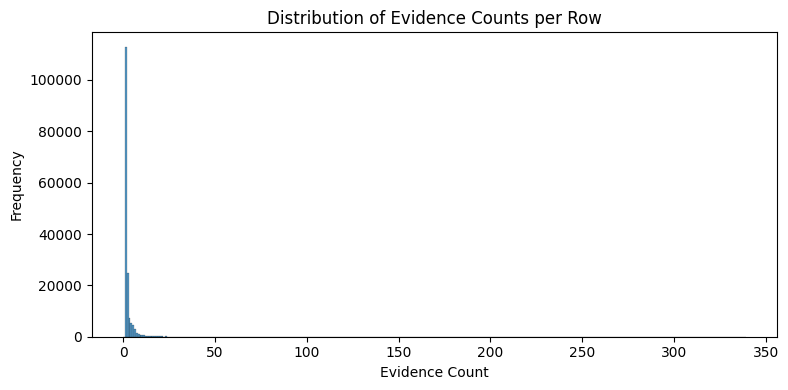

In [25]:
plt.figure(figsize=(8, 4))
sns.histplot(FEVER_df["evidence_count"], bins=range(0, FEVER_df["evidence_count"].max()+2), kde=False)
plt.title("Distribution of Evidence Counts per Row")
plt.xlabel("Evidence Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# End